In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
sns.set(font_scale=2)

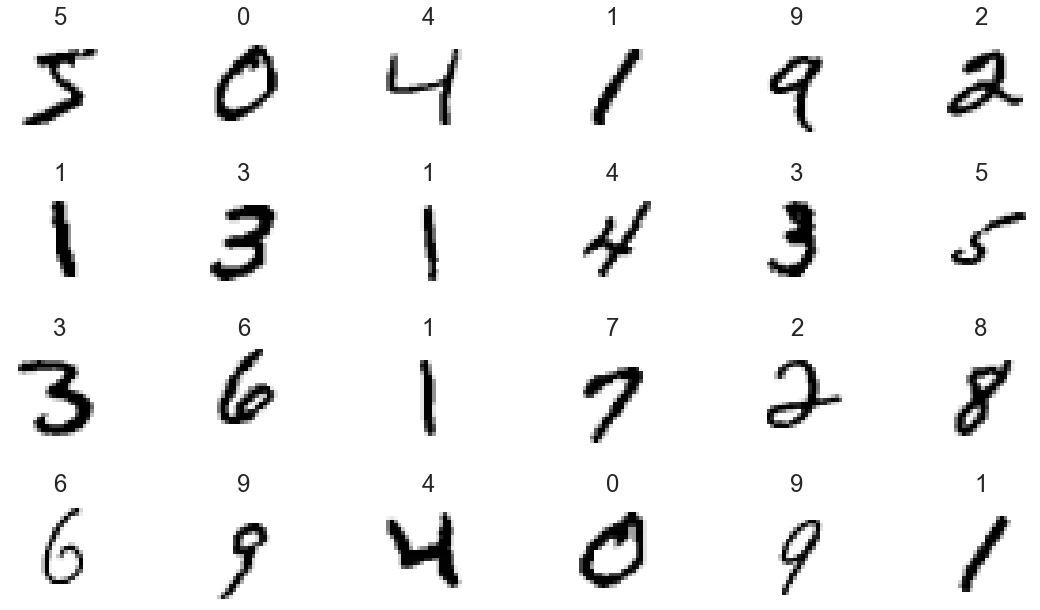

In [14]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [15]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255

In [18]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_test = X_test.astype('float32') / 255

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
y_test = to_categorical(y_test)

In [26]:
y_test.shape

(10000, 10)

In [27]:
from tensorflow.keras.models import load_model

In [28]:
my_model = load_model('exercise16_19.h5')

In [29]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 62)                7

In [34]:
import numpy as np
padding = np.zeros((60000, 52), dtype='float32')

In [36]:
y_train2 = np.concatenate((y_train, padding), axis=1)

In [37]:
y_train2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
loss, accuracy = my_model.evaluate(X_train, y_train2)

1875/1875 [==============================] - 22s 12ms/step - loss: 0.5081 - accuracy: 0.80680s - loss: 0.5095 


In [31]:
predictions = my_model.predict(X_train)

In [32]:
predictions[0]

array([1.69759140e-08, 8.99686506e-11, 2.66015348e-07, 1.04902843e-02,
       8.87480690e-17, 9.59764302e-01, 9.95659999e-09, 1.65499287e-12,
       7.43038981e-08, 1.11535599e-07, 1.38914854e-15, 4.32082743e-08,
       1.10603412e-06, 1.74835378e-07, 8.75786554e-07, 1.04569363e-05,
       1.42387350e-07, 1.68337707e-17, 4.92012114e-05, 6.21619448e-03,
       2.38563547e-09, 2.03452245e-07, 1.00680233e-13, 5.74193945e-14,
       1.53005217e-08, 5.79661319e-12, 2.43249886e-12, 8.61981445e-19,
       1.91916414e-02, 1.52755547e-05, 5.80727003e-12, 1.51764983e-12,
       1.28591776e-10, 2.09079160e-11, 7.57725900e-08, 1.65624350e-08,
       4.36539777e-10, 6.38418896e-07, 1.82815199e-07, 6.91394608e-10,
       8.43983230e-08, 7.34890273e-06, 1.85273052e-06, 2.09073403e-09,
       2.90808771e-06, 1.12685328e-03, 5.66859441e-11, 4.57114450e-11,
       1.28059241e-09, 1.08526165e-11, 2.59526789e-10, 7.75348210e-13,
       8.91869547e-08, 2.47224197e-09, 2.65164720e-03, 4.65752411e-04,
      

In [39]:
images = X_train.reshape((60000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_train2)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [40]:
len(incorrect_predictions)

11591

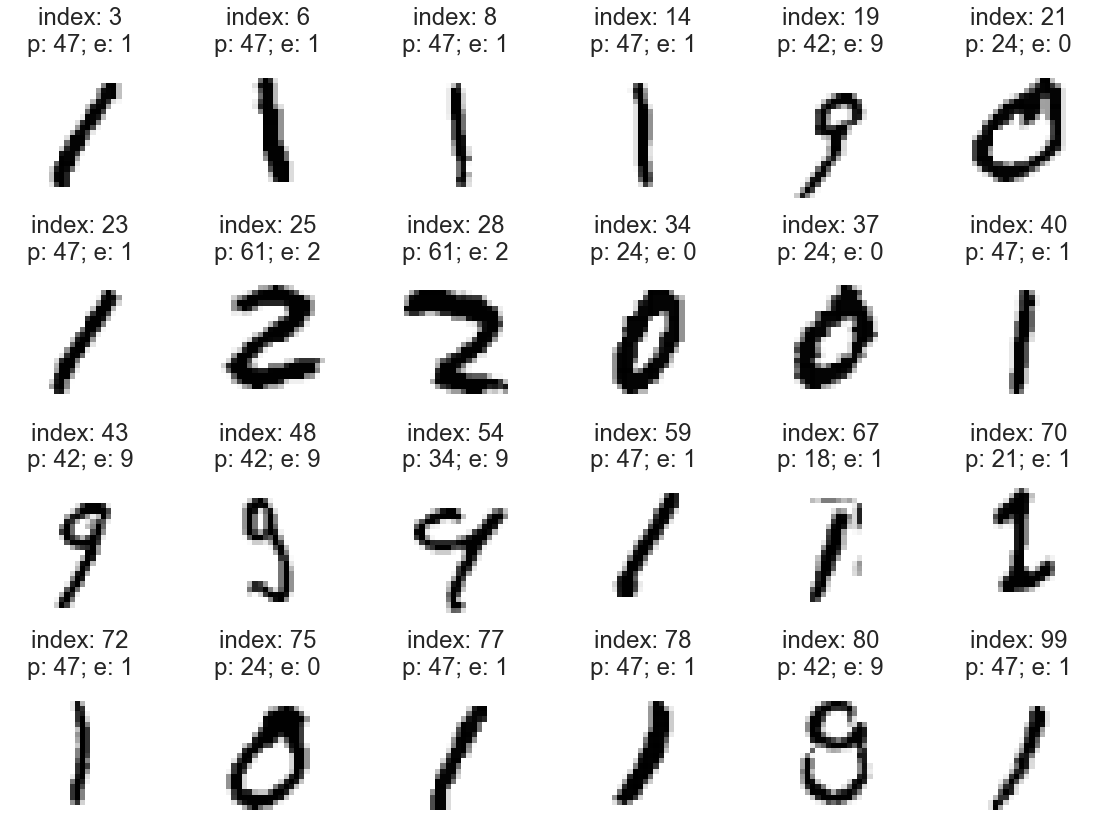

In [41]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()